In [1]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load in the data
box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Question 1: Average voter rating and popularity vs gross
## Merge important dataframes
Merge movie_budgets with tmdb_movies

In [3]:
# rename column key in movie_budgets to match key in tmdb_movies
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)

In [4]:
# create new dataframe and assign it to the merging of tmdb_movies and movie_budgets
movie_financials_and_popularity = pd.merge(movie_budgets, tmdb_movies, on='title') # use title as merging key

In [5]:
# drop duplicated or irrelevant columns
movie_financials_and_popularity.drop(columns=['genre_ids', 'original_title', 'id_x',
                                              'original_language', 'release_date_y', 'Unnamed: 0'], inplace=True)
movie_financials_and_popularity.rename(columns={'release_date_x': 'release_date'}, inplace=True)
movie_financials_and_popularity.head() # print dataframe to check that merging and dropping worked correctly

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",141052,34.953,6.2,7510


## Clean data to get money values to integers

In [6]:
# call function made to clean data
money_values_to_integer(movie_financials_and_popularity, 'production_budget')
money_values_to_integer(movie_financials_and_popularity, 'domestic_gross')
money_values_to_integer(movie_financials_and_popularity, 'worldwide_gross')

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,299536,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
...,...,...,...,...,...,...,...,...,...
2380,"Sep 1, 2015",Exeter,25000,0,489792,226458,5.934,4.7,121
2381,"Apr 21, 2015",Ten,25000,0,0,279516,1.575,5.4,5
2382,"Dec 31, 2014",Dry Spell,22000,0,0,255266,0.600,6.0,1
2383,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,86304,2.078,3.9,19


In [7]:
# remove data with no numbers or low values for worldwide gross and vote count
movies_to_remove = movie_financials_and_popularity.loc[(movie_financials_and_popularity['worldwide_gross'] <= 10000000) 
                                                       | (movie_financials_and_popularity['vote_count'] <= 100)]
movie_financials_and_popularity.drop(index=movies_to_remove.index, inplace=True)

In [8]:
# remove duplicated id numbers
movie_financials_and_popularity.sort_values(by='worldwide_gross', inplace=True)
movie_financials_and_popularity.drop_duplicates(subset='id_y', inplace=True)

In [9]:
movie_financials_and_popularity.sort_values(by='production_budget', ascending=False, inplace=True)
movie_financials_and_popularity

,release_date,title,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,19995,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1865,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,99861,44.383,7.3,13457
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,141052,34.953,6.2,7510
7,"Nov 6, 2015",Spectre,300000000,200074175,879620923,206647,30.318,6.4,6719
...,...,...,...,...,...,...,...,...,...
2253,"Nov 15, 1974",Benji,500000,31559560,31559560,495193,10.503,7.0,138
202,"Apr 23, 2009",Home,500000,15433,44793168,228161,12.835,6.8,2372
1324,"Oct 17, 1978",Halloween,325000,47000000,70000000,424139,20.839,6.4,2020
1544,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,339408,8.152,6.5,328


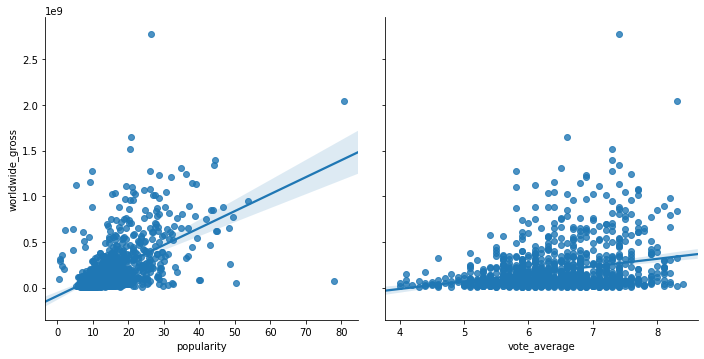

In [10]:
sns.pairplot(movie_financials_and_popularity, y_vars=['worldwide_gross'],
             x_vars=['popularity', 'vote_average'], kind='reg', height=5)

# Question 2: Effect of different actors and directors on profitability

In [11]:
new_name_basics = name_basics[['nconst', 'primary_name', 'primary_profession']]
new_basic_title = title_basics[['tconst', 'primary_title']]
new_crew_title = title_crew[['tconst', 'directors', 'writers']]
new_principals_title = title_principals[['tconst', 'nconst']]
new_ratings_title = title_ratings[['tconst', 'averagerating', 'numvotes']]
title_alias = alt_title_names[['title_id', 'title', 'region']]

In [12]:
title_alias.rename(columns={'title_id': 'tconst'})
title_alias.dropna(inplace=True)
to_remove = title_alias.loc[title_alias['region'] != 'US']
title_alias.drop(index=to_remove.index, inplace=True)
title_alias.head()

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gideon\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US


In [13]:
movie_budgets.drop_duplicates(subset='title', inplace=True)
movie_budgets['title'].value_counts()

Steal (Canadian Release)    1
Just Go With It             1
Mutual Friends              1
Sinister 2                  1
Quo Vadis?                  1
                           ..
Ghost Ship                  1
Highlander                  1
The Fits                    1
El orfanato                 1
Bride & Prejudice           1
Name: title, Length: 5698, dtype: int64

In [14]:
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'worldwide_gross')
movie_budgets['profitability'] = movie_budgets['worldwide_gross']/movie_budgets['production_budget']

In [15]:
budgets_and_aliases = pd.merge(title_alias, movie_budgets, on='title')

In [16]:
movies_to_remove = budgets_and_aliases.loc[(budgets_and_aliases['worldwide_gross'] <= 10000000)]
budgets_and_aliases.drop(index=movies_to_remove.index, inplace=True)

In [17]:
gross_and_titles = budgets_and_aliases[['title_id', 'title', 'worldwide_gross', 'profitability']]
gross_and_titles['title'].value_counts()

The Return            9
Home                  8
Redemption            7
Stuck                 6
Trapped               6
                     ..
Down and Dangerous    1
Annabelle             1
Transcendence         1
Star Trek Beyond      1
The Expendables 2     1
Name: title, Length: 1235, dtype: int64

In [18]:
gross_and_titles.drop_duplicates(subset='title', inplace=True)
gross_and_titles['title'].value_counts()

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Jack and Jill          1
Sinister 2             1
Frontera               1
The Wild               1
Final Destination 5    1
                      ..
Lottery Ticket         1
Holly                  1
Blended                1
No Escape              1
The Expendables 2      1
Name: title, Length: 1235, dtype: int64

In [19]:
title_crew.rename(columns={'tconst': 'title_id'}, inplace=True)
title_crew.dropna(inplace=True)
title_crew.groupby(by='title_id').head()

,title_id,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"
...,...,...,...
146137,tt8998302,nm10121510,nm10121510
146138,tt8999892,nm10122247,"nm10122247,nm10122246"
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477


In [20]:
crew_and_gross = pd.merge(title_crew, gross_and_titles, on='title_id')
crew_and_gross

,title_id,directors,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [21]:
crew_and_gross.rename(columns={'directors': 'nameconstant'}, inplace=True)
new_name_basics.rename(columns={'nconst': 'nameconstant'}, inplace=True)
crew_and_gross

C:\Users\Gideon\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,title_id,nameconstant,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [22]:
crew_names_and_gross = pd.merge(crew_and_gross, new_name_basics, on='nameconstant')
crew_names_and_gross

,title_id,nameconstant,writers,title,worldwide_gross,profitability,primary_name,primary_profession
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001,Rod Lurie,"writer,director,producer"
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544,Taylor Hackford,"producer,director,writer"
2,tt1904996,nm0000431,"nm0572352,nm0922799",Parker,24405825.0,0.697309,Taylor Hackford,"producer,director,writer"
3,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068,Roger Michell,"director,producer,actor"
4,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957,Adam Shankman,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...
1092,tt1741273,nm0712753,"nm0712753,nm0002728,nm3160078",Secret in Their Eyes,16612072.0,0.830604,Billy Ray,"writer,director,producer"
1093,tt2467046,nm0002184,"nm0420874,nm0481542,nm0482510,nm1146036",Left Behind,41382841.0,2.299047,Vic Armstrong,"stunts,assistant_director,actor"
1094,tt3148952,nm0369442,"nm0369442,nm2789152,nm2319441,nm2497348",The Circle,27147349.0,1.508186,Stefan Haupt,"director,writer,producer"
1095,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN,Kirk Loudon,"writer,director,editor"


In [23]:
profitability_by_director = crew_names_and_gross.groupby(by='primary_name').mean()
profitability_by_director.dropna(inplace=True)

In [24]:
number_of_movies_by_director = crew_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_director.dropna(inplace=True)

In [25]:
profitability_by_director['num_of_movies'] = number_of_movies_by_director

In [57]:
multi_movie_directors = profitability_by_director.loc[profitability_by_director['num_of_movies'] >= 2]
multi_movie_directors.sort_values(by='profitability', ascending=False, inplace=True)
clean_director_columns(multi_movie_directors)

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gideon\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Director,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Sam Raimi,2.571265e+08,49.013898,2
1,Ryan Coogler,6.913817e+08,32.124904,2
2,James Gray,2.579304e+08,12.019347,3
3,Lee Daniels,2.067881e+08,9.029198,2
4,David Frankel,3.275505e+08,9.012066,2
...,...,...,...,...
189,Robert Luketic,4.318747e+07,0.762678,2
190,Rob Reiner,1.451371e+07,0.762361,2
191,Wes Craven,2.542130e+07,0.758725,2
192,Paul W.S. Anderson,2.453416e+07,0.446459,2


In [58]:
top_multi_movie_directors = multi_movie_directors.iloc[0:20]
top_multi_movie_directors.reset_index(inplace=True)
top_multi_movie_directors

,index,Director,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,0,Sam Raimi,2.571265e+08,49.013898,2
1,1,Ryan Coogler,6.913817e+08,32.124904,2
2,2,James Gray,2.579304e+08,12.019347,3
3,3,Lee Daniels,2.067881e+08,9.029198,2
4,4,David Frankel,3.275505e+08,9.012066,2
5,5,Spike Lee,2.276117e+07,8.360006,2
6,6,Bill Condon,7.361599e+08,8.197399,2
7,7,David Wain,6.088449e+07,7.862978,2
8,8,Gregory Plotkin,4.291844e+07,7.503885,2
9,9,Catherine Hardwicke,3.625032e+07,7.127644,2


Text(0.5, 1.0, 'Director vs Average Profit')

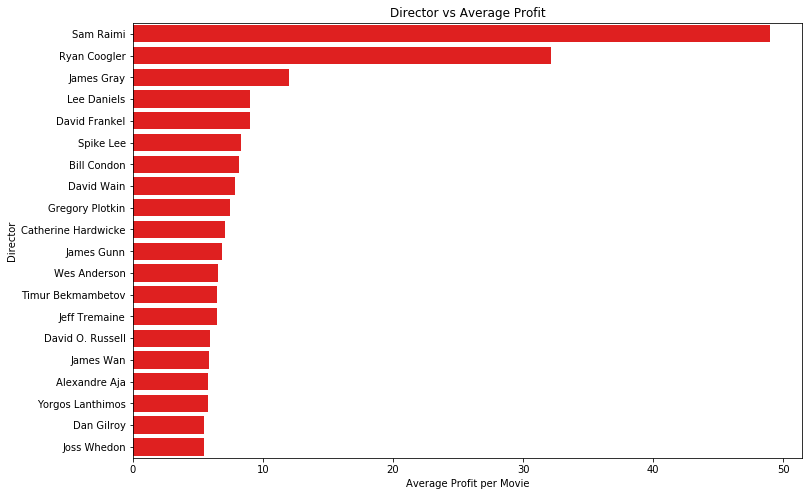

In [59]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Director', x='Average Profit per Movie', data=top_multi_movie_directors, color='r')
plt.title('Director vs Average Profit')

In [68]:
multi_movie_directors['Average Worldwide Box Office'] = multi_movie_directors['Average Worldwide Box Office'].astype('int64')
multi_movie_directors.describe()

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,1.940000e+02,194.000000,194.000000
mean,2.107219e+08,3.480135,2.530928
std,2.164023e+08,4.274090,0.917065
min,1.055142e+07,0.117238,2.000000
25%,5.962061e+07,1.911900,2.000000
50%,1.394859e+08,2.647723,2.000000
75%,2.734396e+08,3.809872,3.000000
max,1.460475e+09,49.013898,7.000000


## Actors

In [30]:
new_principals_title.rename(columns={'tconst': 'title_id', 'nconst': 'nameconstant'}, inplace=True)
new_principals_title.dropna(inplace=True)
new_principals_title.groupby(by='title_id')

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
principals_and_gross = pd.merge(new_principals_title, gross_and_titles, on='title_id')

In [32]:
principal_names_and_gross = pd.merge(principals_and_gross, new_name_basics, on='nameconstant')
principal_names_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 0 to 11737
Data columns (total 7 columns):
title_id              11738 non-null object
nameconstant          11738 non-null object
title                 11738 non-null object
worldwide_gross       11461 non-null float64
profitability         11461 non-null float64
primary_name          11738 non-null object
primary_profession    11646 non-null object
dtypes: float64(2), object(5)
memory usage: 733.6+ KB


In [33]:
principal_names_and_gross['primary_profession'].astype('str')
actor_names_and_gross = principal_names_and_gross.loc[(principal_names_and_gross['primary_profession'].str.contains(pat='actor'))
                                                      | (principal_names_and_gross['primary_profession'].str.contains(pat='actress'))]

In [34]:
profitability_by_actor = actor_names_and_gross.groupby(by='primary_name').mean()

In [35]:
profitability_by_actor.dropna(inplace=True)
profitability_by_actor

,worldwide_gross,profitability
primary_name,,
50 Cent,40979542.0,1.058659
AJ Michalka,225990976.0,4.519820
Aamir Khan,35067665.0,1.524681
Aaron Berger,50054511.0,1.001090
Aaron Buechel,95255485.0,0.952555
...,...,...
Zoë Kravitz,194353295.0,1.698874
Zulay Henao,20000000.0,33.333333
Zuzana Mauréry,157092943.0,1.745477


In [36]:
number_of_movies_by_actor = actor_names_and_gross.groupby(by='primary_name').size()
number_of_movies_by_actor.dropna(inplace=True)

In [37]:
profitability_by_actor['num_of_movies'] = number_of_movies_by_actor

In [62]:
multi_movie_actors = profitability_by_actor.loc[(profitability_by_actor['num_of_movies'] >= 3)]
multi_movie_actors.sort_values(by='profitability', ascending=False, inplace=True)
clean_actor_columns(multi_movie_actors)
multi_movie_actors.head(20)

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Actor,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
0,Dan Stevens,7.443914e+08,26.595277,3
1,Michelle Williams,1.431295e+08,21.091803,5
2,Rachel Weisz,1.402361e+08,18.631898,6
3,Octavia Spencer,9.093804e+07,17.719846,4
4,Dermot Mulroney,1.182542e+08,15.772292,3
5,Forest Whitaker,1.029222e+08,14.875318,5
6,Michael B. Jordan,3.470613e+08,14.309343,5
7,James Franco,1.797355e+08,13.551901,9
8,Shia LaBeouf,4.841425e+08,13.050784,3
9,RZA,1.641010e+07,12.932468,3


In [63]:
top_multi_movie_actors = multi_movie_actors.iloc[0:20]

Text(0.5, 1.0, 'Actor vs Average Profit')

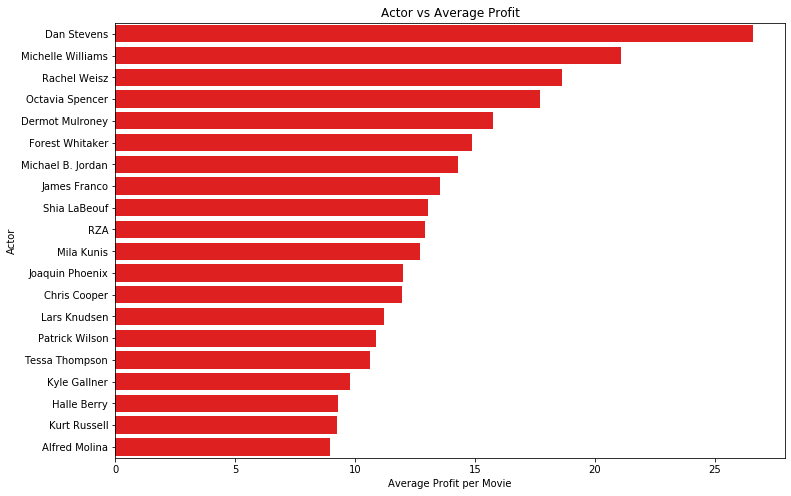

In [64]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Actor', x='Average Profit per Movie', data=top_multi_movie_actors, color='r')
plt.title('Actor vs Average Profit')

In [70]:
multi_movie_actors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,5.570000e+02,557.000000,557.000000
mean,2.220497e+08,3.613492,4.820467
std,1.716674e+08,2.552801,2.479429
min,1.591161e+07,0.610757,3.000000
25%,9.523055e+07,2.284559,3.000000
50%,1.795922e+08,2.971061,4.000000
75%,2.899794e+08,4.007731,6.000000
max,1.031005e+09,26.595277,17.000000


In [74]:
multi_movie_directors.describe()

,Average Worldwide Box Office,Average Profit per Movie,Number of Movies
count,1.940000e+02,194.000000,194.000000
mean,2.107219e+08,3.480135,2.530928
std,2.164023e+08,4.274090,0.917065
min,1.055142e+07,0.117238,2.000000
25%,5.962061e+07,1.911900,2.000000
50%,1.394859e+08,2.647723,2.000000
75%,2.734396e+08,3.809872,3.000000
max,1.460475e+09,49.013898,7.000000
